In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [9]:
path = '/Users/james/machinelearning/LR/data/2.csv'
data2 = pd.read_csv(path, header= None , names=['Size','Bedrooms','Price'])
data2.head()

,Size,Bedrooms,Price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [10]:
#feature normalization
data2 = (data2-data2.mean())/data2.std()
data2.head()

,Size,Bedrooms,Price
0,-0.495977,-0.226166,-0.073110
1,0.499874,-0.226166,0.236953
2,-0.725023,-1.526618,-0.849457
3,1.246762,1.074287,1.592190
4,-0.016724,1.074287,-0.311010


In [11]:
# add ones column
data2.insert(0, 'Ones', 1)
# set X (training data) and y (target variable)
cols = data2.shape[1]  
X2 = data2.iloc[:,0:cols-1]  
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
theta2 = np.matrix(np.array([0,0,0])) 

In [12]:
def computeCost(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [14]:
np.matrix(np.zeros(theta2.shape))

matrix([[0., 0., 0.]])

In [8]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameter = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T)-y
        
        for j in range(parameter):
            term = np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j] - (alpha/len(X)*np.sum(term))
        
        theta = temp
        cost[i] = computeCost(X,y,theta)
    return theta,cost

            
            
            

In [13]:
alpha = 0.01
iters = 1000
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)

g2

matrix([[ 8.85583877e-17,  8.77621259e-01, -4.36063570e-02]])

In [14]:
computeCost(X2, y2, g2) 

0.12996890872214698

Text(0.5,1,'Error vs. Training Epoch')

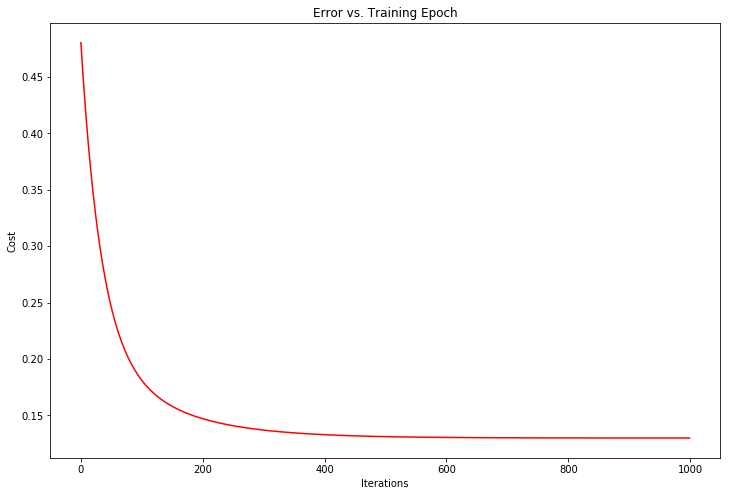

In [17]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 